In [1]:
import os
import sys

dir = os.path.abspath('')
parent = os.path.dirname(dir)
if not parent in sys.path:
    sys.path.append(parent)


In [11]:
import matplotlib.pyplot as plt
import torch
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms import Compose
from torchvision.transforms import functional as F

from data.custom_celeba import CelebA, xywh2xyxy

import cv2 as cv


In [3]:
training_data = CelebA(
    '../CelebA',
    target_transform=Compose([xywh2xyxy, torch.Tensor.float])
)


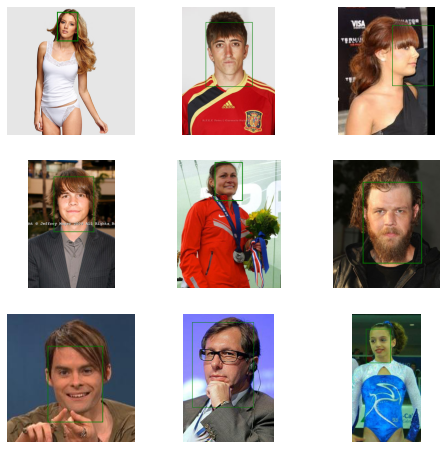

In [5]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    
    img = F.pil_to_tensor(img)
    
    img = draw_bounding_boxes(img, label.unsqueeze_(0), colors='green', width=img.shape[2]//128)
    figure.add_subplot(rows, cols, i)
    plt.axis('off')
    plt.imshow(F.to_pil_image(img))


/home/anton/anaconda3/envs/cv2/lib/python3.10/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


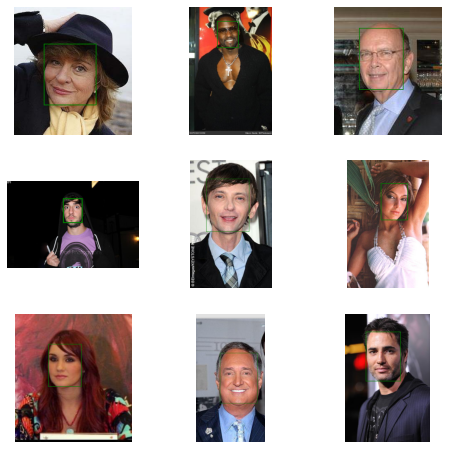

In [9]:
from facenet_pytorch import MTCNN

model = MTCNN()

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, _ = training_data[sample_idx]
    
    pred, _ = model.detect(img)
    pred = torch.tensor(pred)
    
    img = F.pil_to_tensor(img)
    
    img = draw_bounding_boxes(img, pred, colors='green', width=img.shape[2]//128)
    figure.add_subplot(rows, cols, i)
    plt.axis('off')
    plt.imshow(F.to_pil_image(img))


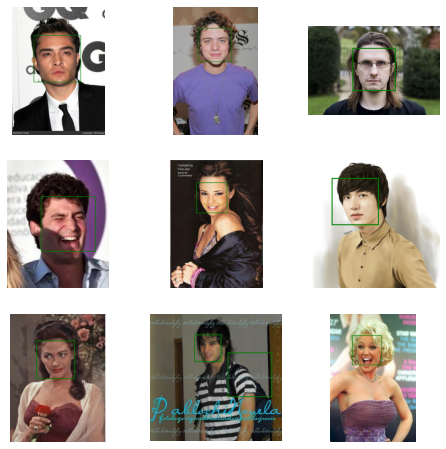

In [28]:
cascade_path = '../cascade/haarcascade_frontalface_alt.xml'

face_cascade = cv.CascadeClassifier()
face_cascade.load(cascade_path)

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, _ = training_data[sample_idx]
    
    img = F.pil_to_tensor(img)
    
    ndarr = img.permute((1, 2, 0)).numpy()
    img_gray = cv.cvtColor(ndarr, cv.COLOR_RGB2GRAY)
    img_gray = cv.equalizeHist(img_gray)

    pred = face_cascade.detectMultiScale(img_gray)
    
    if isinstance(pred, tuple):
        continue
    
    pred[:, 2] += pred[:, 0]
    pred[:, 3] += pred[:, 1]
    
    pred = torch.tensor(pred)
    
    img = draw_bounding_boxes(img, pred, colors='green', width=img.shape[2]//128)
    figure.add_subplot(rows, cols, i)
    plt.axis('off')
    plt.imshow(F.to_pil_image(img))